## This is a RandomForest Classification Model used for predicting the approval chances of a customer's loan application

In [1]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from math import sqrt
from sklearn.preprocessing import LabelEncoder

In [2]:
#import historical loan dataset

In [3]:
loan = pd.read_csv(r"/Users/kikelomoobayemi/Downloads/train_ctrUa4K.csv")

## The data cleaning steps

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
#checking for duplicate data
loan['Loan_ID'].nunique()

614

/Users/kikelomoobayemi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

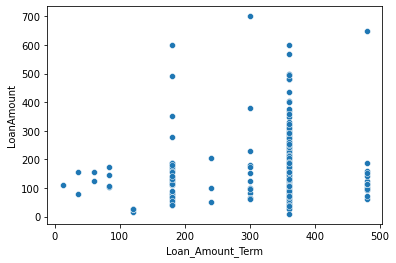

In [6]:
#scatterplot to see if there is correlation between loan Amount and Loan Term
sns.scatterplot(loan['Loan_Amount_Term'], loan['LoanAmount'])


In [7]:
#summary stats
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
#label encoding for categorical variables
le = LabelEncoder()
loan['Self_Employed'] = le.fit_transform(loan['Self_Employed'])
loan['Property_Area'] = le.fit_transform(loan['Property_Area'])
loan['Education'] = le.fit_transform(loan['Education'])
loan['Gender'] = le.fit_transform(loan['Gender'])
loan['Married'] = le.fit_transform(loan['Married'])
loan['Loan_Status'] = le.fit_transform(loan['Loan_Status'])

In [10]:
#change data type to categorical

loan['Gender'] = loan['Gender'].astype('category')
loan['Married'] = loan['Married'].astype('category')
loan['Loan_Status'] = loan['Loan_Status'].astype('category')
loan['Self_Employed'] = loan['Self_Employed'].astype('category')
loan['Property_Area'] = loan['Property_Area'].astype('category')
loan['Education'] = loan['Education'].astype('category')
loan['Credit_History'] = loan['Credit_History'].astype('category')

In [11]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [12]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            614 non-null    object  
 1   Gender             614 non-null    category
 2   Married            614 non-null    category
 3   Dependents         599 non-null    object  
 4   Education          614 non-null    category
 5   Self_Employed      614 non-null    category
 6   ApplicantIncome    614 non-null    int64   
 7   CoapplicantIncome  614 non-null    float64 
 8   LoanAmount         592 non-null    float64 
 9   Loan_Amount_Term   600 non-null    float64 
 10  Credit_History     564 non-null    category
 11  Property_Area      614 non-null    category
 12  Loan_Status        614 non-null    category
dtypes: category(7), float64(3), int64(1), object(2)
memory usage: 34.0+ KB


In [14]:
loan = loan.dropna(subset = ['Credit_History', 'LoanAmount'])

In [15]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            543 non-null    object  
 1   Gender             543 non-null    category
 2   Married            543 non-null    category
 3   Dependents         530 non-null    object  
 4   Education          543 non-null    category
 5   Self_Employed      543 non-null    category
 6   ApplicantIncome    543 non-null    int64   
 7   CoapplicantIncome  543 non-null    float64 
 8   LoanAmount         543 non-null    float64 
 9   Loan_Amount_Term   529 non-null    float64 
 10  Credit_History     543 non-null    category
 11  Property_Area      543 non-null    category
 12  Loan_Status        543 non-null    category
dtypes: category(7), float64(3), int64(1), object(2)
memory usage: 34.3+ KB


In [16]:
loan = loan.replace("3+", 3)

In [17]:
loan['Dependents'] = loan['Dependents'].astype('float64')

In [18]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            543 non-null    object  
 1   Gender             543 non-null    category
 2   Married            543 non-null    category
 3   Dependents         530 non-null    float64 
 4   Education          543 non-null    category
 5   Self_Employed      543 non-null    category
 6   ApplicantIncome    543 non-null    int64   
 7   CoapplicantIncome  543 non-null    float64 
 8   LoanAmount         543 non-null    float64 
 9   Loan_Amount_Term   529 non-null    float64 
 10  Credit_History     543 non-null    category
 11  Property_Area      543 non-null    category
 12  Loan_Status        543 non-null    category
dtypes: category(7), float64(4), int64(1), object(1)
memory usage: 34.3+ KB


In [19]:
loan['Dependents'] = loan['Dependents'].fillna(0)
loan['Loan_Amount_Term'] = loan['Loan_Amount_Term'].fillna(360)


In [20]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            543 non-null    object  
 1   Gender             543 non-null    category
 2   Married            543 non-null    category
 3   Dependents         543 non-null    float64 
 4   Education          543 non-null    category
 5   Self_Employed      543 non-null    category
 6   ApplicantIncome    543 non-null    int64   
 7   CoapplicantIncome  543 non-null    float64 
 8   LoanAmount         543 non-null    float64 
 9   Loan_Amount_Term   543 non-null    float64 
 10  Credit_History     543 non-null    category
 11  Property_Area      543 non-null    category
 12  Loan_Status        543 non-null    category
dtypes: category(7), float64(4), int64(1), object(1)
memory usage: 34.3+ KB


In [21]:
#setting features and label

X = loan.drop(['Loan_Status','Loan_ID'], axis = 1)
y = loan['Loan_Status']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75, random_state=42)
X_train.shape, X_test.shape

((407, 11), (136, 11))

## Building the RandomForest Classification Model

In [24]:
classifier_rf = RandomForestClassifier(random_state = 42, n_jobs = -1, max_depth = 5, 
                n_estimators = 100, oob_score = True)


classifier_rf.fit(X_train,y_train)
classifier_rf.oob_score_

0.8034398034398035

In [26]:
#Implementing GridSearch to get the best parameters

In [27]:
rf = RandomForestClassifier(random_state = 42, n_jobs = -1)
params = {
            'max_depth': [2,3,5,10,20],
            'min_samples_leaf': [5,10,20,50,100,200],
            'n_estimators': [10,25,30,50,100,200]
        }

In [28]:
#Instantiate the grid search model

grid_search = GridSearchCV(estimator = rf,
               param_grid = params,
               cv = 4,
               n_jobs = -1, verbose = 1, scoring = "accuracy")

grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [29]:
print("Best CV accuracy: {}, with parameters: {}".format(
    grid_search.best_score_, grid_search.best_params_))

Best CV accuracy: 0.8107891671520093, with parameters: {'max_depth': 2, 'min_samples_leaf': 5, 'n_estimators': 10}


In [30]:
classifier_rf2 = RandomForestClassifier(random_state = 42, n_jobs = -1, max_depth = 2, 
                n_estimators = 10, min_samples_leaf = 5, oob_score = True)


classifier_rf2.fit(X,y)
classifier_rf2.oob_score_

/Users/kikelomoobayemi/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/kikelomoobayemi/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


0.8011049723756906

In [31]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    r2 = r2_score(y_pred=predictions, y_true=y_test)
    rmse = sqrt(mean_squared_error(y_test, predictions))
    mae=mean_absolute_error(y_test, predictions)
    print('Model Performance')
    print('R2 = {:0.2f}%.'.format(r2))
    print('RMSE = {:0.2f}.'.format(rmse))
    print('MAE = {:0.2f}.'.format(mae))
    print(predictions)

In [32]:
evaluate(classifier_rf2, X_test, y_test)

Model Performance
R2 = 0.21%.
RMSE = 0.39.
MAE = 0.15.
[1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0]


In [33]:
#import dataset for predictions

In [34]:
loan_test = pd.read_csv(r'/Users/kikelomoobayemi/Downloads/test_lAUu6dG.csv')

In [35]:
loan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [36]:
loan_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


## Repeating the same cleaning process for the test csv file

In [37]:
#label encoding for categorical variables
le1 = LabelEncoder()
loan_test['Self_Employed'] = le1.fit_transform(loan_test['Self_Employed'])
loan_test['Property_Area'] = le1.fit_transform(loan_test['Property_Area'])
loan_test['Education'] = le1.fit_transform(loan_test['Education'])
loan_test['Gender'] = le1.fit_transform(loan_test['Gender'])
loan_test['Married'] = le1.fit_transform(loan_test['Married'])


In [38]:
#change data type to categorical

loan_test['Gender'] = loan_test['Gender'].astype('category')
loan_test['Married'] = loan_test['Married'].astype('category')
loan_test['Self_Employed'] = loan_test['Self_Employed'].astype('category')
loan_test['Property_Area'] = loan_test['Property_Area'].astype('category')
loan_test['Education'] = loan_test['Education'].astype('category')
loan_test['Credit_History'] = loan_test['Credit_History'].astype('category')

In [39]:
loan_test = loan_test.replace("3+", 3)

In [40]:
loan_test['Dependents'] = loan_test['Dependents'].astype('float64')

In [41]:
loan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            367 non-null    object  
 1   Gender             367 non-null    category
 2   Married            367 non-null    category
 3   Dependents         357 non-null    float64 
 4   Education          367 non-null    category
 5   Self_Employed      367 non-null    category
 6   ApplicantIncome    367 non-null    int64   
 7   CoapplicantIncome  367 non-null    int64   
 8   LoanAmount         362 non-null    float64 
 9   Loan_Amount_Term   361 non-null    float64 
 10  Credit_History     338 non-null    category
 11  Property_Area      367 non-null    category
dtypes: category(6), float64(3), int64(2), object(1)
memory usage: 20.2+ KB


In [42]:
loan_test['Dependents'] = loan_test['Dependents'].fillna(0)
loan_test['Loan_Amount_Term'] = loan_test['Loan_Amount_Term'].fillna(360)
loan_test['LoanAmount'] = loan_test['LoanAmount'].fillna(loan_test['LoanAmount'].mean())
loan_test['Credit_History'] = loan_test['Credit_History'].fillna(0)

In [43]:
loan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            367 non-null    object  
 1   Gender             367 non-null    category
 2   Married            367 non-null    category
 3   Dependents         367 non-null    float64 
 4   Education          367 non-null    category
 5   Self_Employed      367 non-null    category
 6   ApplicantIncome    367 non-null    int64   
 7   CoapplicantIncome  367 non-null    int64   
 8   LoanAmount         367 non-null    float64 
 9   Loan_Amount_Term   367 non-null    float64 
 10  Credit_History     367 non-null    category
 11  Property_Area      367 non-null    category
dtypes: category(6), float64(3), int64(2), object(1)
memory usage: 20.2+ KB


In [53]:
X_for_pred = loan_test.drop('Loan_ID', axis = 1)

In [54]:
predicted_values = classifier_rf2.predict(X_for_pred)

In [55]:
len(predicted_values)

367

In [56]:
predicted_values = le.inverse_transform(predicted_values)

In [57]:
predicted_values = pd.DataFrame(predicted_values)

In [58]:
predicted_values.head()

,0
0,Y
1,Y
2,Y
3,N
4,Y


In [59]:
predicted_values.to_csv(r'/Users/kikelomoobayemi/Downloads/predicted_values.csv')